# Korelasi Antara Nilai Matematika (TKA Saintek) pada UTBK 2019 dengan Kelulusan Peserta

Ujian Tulis Berbasis Komputer (UTBK) merupakan tes masuk ke perguruan tinggi yang dilaksanakan oleh Lembaga Tes Masuk Perguruan Tinggi (LTMPT) sebagai satu-satunya lembaga penyelenggara tes perguruan tinggi terstandar di Indonesia. UTBK merupakan syarat utama untuk mengikuti Seleksi Bersama Masuk Perguruan Tinggi (SBMPTN). Sejak tahun 2019, Seleksi Bersama Masuk Perguruan Tinggi Negeri (SBMPTN) merupakan seleksi penerimaan mahasiswa baru dengan menggunakan hasil UTBK saja atau hasil UTBK dan kriteria lain yang ditetapkan bersama oleh PTN. Tujuan dari pelaksanaan UTBK ini adalah untuk memprediksi calon mahasiswa yang mampu menyelesaikan studi di perguruan tinggi dengan baik dan tepat waktu. Dalam kesempatan kali ini kami ingin melihat apabila nilai matematika yang didapatkan oleh peserta UTBK mempengaruhi lolos atau tidaknya mereka ke PTN yang mereka minati.

sumber: https://ltmpt.ac.id/?mid=8#a3

## 1. Data Collection

Data yang digunakan dalam proyek ini didapatkan dari https://www.kaggle.com/ekojsalim/indonesia-college-entrance-examination-utbk-2019 dimana data ini dikumpulkan dari sebuah situs yang memberikan peserta UTBK wadah untuk mengirimkan nilai mereka dengan tujuan untuk membandingkan nilainya dengan peserta UTBK lainnya. 

Data ini memaparkan nilai dari setiap ujian yang diikuti oleh peserta. Tes Potensi Skolastik (TPS) dan Tes Kompetensi Akademik (TKA) sesuai dengan kelompok ujian setiap peserta ujian. TPS mengukur kemampuan kognitif, yaitu kemampuan penalaran dan pemahaman umum yang penting untuk keberhasilan di sekolah formal, khususnya pendidikan tinggi. Sedangkan TKA mengukur pengetahuan dan pemahaman keilmuan yang diajarkan di sekolah dan diperlukan seseorang agar dapat berhasil dalam menempuh pendidikan tinggi.

Adapun TPS meliputi:
* KPU - Kemampuan Penalaran Umum - General Reasoning
* Kua - Kemampuan Kuantitatif - Quantitative Skills
* PPU - Pengetahuan & Pemahaman Umum - General Knowledge & Understanding
* KMB - Kemampuan Memahami Bacaan & Menulis - Reading Comprehension & Writing

TKA saintek meliputi:
* Mathematics (mat)
* Physics (fis)
* Chemistry (kim)
* Biology (bio)

sumber: https://edukasi.kompas.com/read/2019/02/28/12281331/ada-soal-hots-ini-jenis-tes-dan-kelompok-ujian-utbk-sbmptn-2019?page=all.


## 2. Data Preparation
Kami menggunakan beberapa file csv yang menunjukkan data program studi (majors.csv) , universitas (universities.csv) , nilai yang didapatkan oleh peserta di bidang saintek (score_science), dan nilai minimum yang didapatkan oleh peserta (bidang saintek) yang lolos UTBK dan SMBPTN 2019 (passinggradesaintek.csv).

In [1]:
import operator
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statistics
import math
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

%matplotlib inline

In [2]:
df_major = pd.read_csv('majors.csv')
df_universities = pd.read_csv('universities.csv')
df_score_science = pd.read_csv('score_science.csv')
df_passing_grade = pd.read_csv(r'passinggradesaintek.csv')

### Persebaran nilai matematika pada ujian TKA Saintek oleh peserta UTBK 2019

Text(0, 0.5, 'Jumlah Peserta')

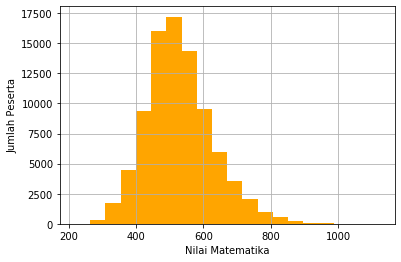

In [3]:
df_math_score = df_score_science['score_mat'].copy() 
df_math_score.hist(bins=20, color='orange')
plt.xlabel('Nilai Matematika')
plt.ylabel('Jumlah Peserta')


# Rata-rata nilai matematika UTBK 2019

In [4]:
average = math.ceil(statistics.mean(df_score_science.score_mat))

print("The average of math test is", average)

The average of math test is 530


### Data frame di bawah ini menunjukkan nilai minimum dari setiap peserta yang berhasil lolos ke program studi dan PTN yang dituju

In [5]:
passingGrade = df_passing_grade[['PTN', 'NAMA PRODI', 'MIN']].copy()
print (passingGrade)

                             PTN                 NAMA PRODI     MIN
0          UNIVERSITAS INDONESIA          PENDIDIKAN DOKTER  724.38
1          UNIVERSITAS AIRLANGGA          PENDIDIKAN DOKTER  702.54
2        UNIVERSITAS PADJADJARAN          PENDIDIKAN DOKTER  694.17
3        UNIVERSITAS GADJAH MADA                 KEDOKTERAN  689.05
4          UNIVERSITAS INDONESIA              ILMU KOMPUTER  685.96
..                           ...                        ...     ...
495          UNIVERSITAS ANDALAS            SISTEM KOMPUTER  582.23
496  UNIVERSITAS NEGERI SEMARANG             PENDIDIKAN IPA  582.14
497    UNIVERSITAS NEGERI MALANG  ILMU KESEHATAN MASYARAKAT  582.05
498        UNIVERSITAS SRIWIJAYA                  PSIKOLOGI  581.97
499        UNIVERSITAS BRAWIJAYA           AGROEKOTEKNOLOGI  581.92

[500 rows x 3 columns]


### Membuat data frame yang berisi peserta dengan nilai matematika yang di atas rata-rata (>530). Lalu mengurutkan data dari nilai matematika tertinggi ke terendah.

In [6]:
df_above_average = df_score_science[(df_score_science['score_mat'] > average)]
df_above_average = df_above_average.sort_values("score_mat", ascending=False)

df_above_average

,Unnamed: 0,id_first_major,id_first_university,id_second_major,id_second_university,id_user,score_bio,score_fis,score_kim,score_kmb,score_kpu,score_kua,score_mat,score_ppu
26336,26336,3321073,332,3611186,361,113662,643,781,745,602,625,855,1123,536
2524,2524,3811014,381,6111014,611,13436,585,639,933,668,586,800,1042,496
7906,7906,3611066,361,3811014,381,41382,533,813,934,540,575,773,1018,599
18604,18604,3211313,321,3321073,332,85298,579,681,830,591,667,783,1017,477
80053,80053,6111022,611,1231035,123,314742,758,719,802,658,758,874,1010,633
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78937,78937,1711381,171,1411041,141,311378,671,677,529,513,517,354,531,504
81656,81656,3531104,353,3551291,355,319986,568,549,552,633,554,561,531,527
85054,85054,3531216,353,3621022,362,332022,498,526,461,529,465,605,531,572
73763,73763,3311047,331,3311032,331,294047,560,535,421,560,600,556,531,539


### Menambahkan kolom nama universitas (university_name) pada 'df_major' 

In [7]:
df_major['university_name']= df_major['id_university'].map(df_universities.set_index('id_university')['university_name'])
df_major.loc[df_major['type']=='science']

,Unnamed: 0,id_major,id_university,type,major_name,capacity,university_name
0,0,1111014,111,science,PENDIDIKAN DOKTER HEWAN,88,UNIVERSITAS SYIAH KUALA
1,1,1111022,111,science,TEKNIK SIPIL,64,UNIVERSITAS SYIAH KUALA
2,2,1111037,111,science,TEKNIK MESIN,48,UNIVERSITAS SYIAH KUALA
3,3,1111045,111,science,TEKNIK KIMIA,48,UNIVERSITAS SYIAH KUALA
4,4,1111053,111,science,ARSITEKTUR,48,UNIVERSITAS SYIAH KUALA
...,...,...,...,...,...,...,...
1704,1704,9211313,921,science,PENDIDIKAN FISIKA,16,UNIVERSITAS PAPUA
1705,1705,9211321,921,science,ILMU TANAH,24,UNIVERSITAS PAPUA
1706,1706,9211336,921,science,NUTRISI DAN TEKNOLOGI PAKAN TERNAK,16,UNIVERSITAS PAPUA
1707,1707,9211344,921,science,TEKNIK PERTANIAN DAN BIOSISTEM,16,UNIVERSITAS PAPUA


### Menggabungkan kolom 'major_name' dan 'university_name' pada data frame 'df_major', dan menggabungkan kolom 'NAMA PRODI' dan 'PTN' pada data frame 'passingGrade' agar nantinya bisa dicocokkan di dataframe 'df_passingGrade' yang berisi 'id_major', 'major_uni', 'Passing_Grade'. 

In [8]:
df_major["major_uni"] = df_major[['major_name', 'university_name']].agg('-'.join, axis=1)
passingGrade["major_uni"] = passingGrade[['NAMA PRODI','PTN']].agg('-'.join, axis=1)
df_passingGrade = df_major[['id_major','major_uni']].copy()
df_passingGrade['Passing_Grade'] = df_passingGrade['major_uni'].map(passingGrade.set_index('major_uni')['MIN'])

df_passingGrade

,id_major,major_uni,Passing_Grade
0,1111014,PENDIDIKAN DOKTER HEWAN-UNIVERSITAS SYIAH KUALA,NaN
1,1111022,TEKNIK SIPIL-UNIVERSITAS SYIAH KUALA,NaN
2,1111037,TEKNIK MESIN-UNIVERSITAS SYIAH KUALA,NaN
3,1111045,TEKNIK KIMIA-UNIVERSITAS SYIAH KUALA,NaN
4,1111053,ARSITEKTUR-UNIVERSITAS SYIAH KUALA,NaN
...,...,...,...
3162,9212011,EKONOMI PEMBANGUNAN-UNIVERSITAS PAPUA,NaN
3163,9212042,MANAJEMEN-UNIVERSITAS PAPUA,NaN
3164,9212057,AKUNTANSI-UNIVERSITAS PAPUA,NaN
3165,9212065,PENDIDIKAN BAHASA INDONESIA-UNIVERSITAS PAPUA,NaN


### Menentukan nilai akhir dari peserta dengan mencari rata-rata dari seluruh nilai yang didapatkan pada ujian TPS dan TKA.

In [9]:
#Showing grade of every applicant

df_above_average.loc[:,'Grade'] = df_above_average[['score_bio',
                                                    'score_kim',
                                                    'score_kmb',
                                                    'score_kpu',
                                                    'score_kua',
                                                    'score_mat',
                                                    'score_ppu']].mean(axis=1)

df_above_average

,Unnamed: 0,id_first_major,id_first_university,id_second_major,id_second_university,id_user,score_bio,score_fis,score_kim,score_kmb,score_kpu,score_kua,score_mat,score_ppu,Grade
26336,26336,3321073,332,3611186,361,113662,643,781,745,602,625,855,1123,536,732.714286
2524,2524,3811014,381,6111014,611,13436,585,639,933,668,586,800,1042,496,730.000000
7906,7906,3611066,361,3811014,381,41382,533,813,934,540,575,773,1018,599,710.285714
18604,18604,3211313,321,3321073,332,85298,579,681,830,591,667,783,1017,477,706.285714
80053,80053,6111022,611,1231035,123,314742,758,719,802,658,758,874,1010,633,784.714286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78937,78937,1711381,171,1411041,141,311378,671,677,529,513,517,354,531,504,517.000000
81656,81656,3531104,353,3551291,355,319986,568,549,552,633,554,561,531,527,560.857143
85054,85054,3531216,353,3621022,362,332022,498,526,461,529,465,605,531,572,523.000000
73763,73763,3311047,331,3311032,331,294047,560,535,421,560,600,556,531,539,538.142857


### Menambahkan kolom baru pada data frame 'df_above_average' yang berisi nilai 'Passing Grade' untuk pilihan pertama dan kedua dari peserta. Lalu dilakukan pengecekkan apabila peserta lulus/tidak pada pilihan pertama, apabila peserta tidak lulus namun nilainya masih memenuhi pilihan kedua, maka peserta tetap dinyatakan lulus.

In [10]:
df_above_average = df_above_average.merge(df_passingGrade[['id_major','Passing_Grade']], left_on='id_first_major', right_on='id_major', how='left').drop('id_major',axis=1).rename(columns={'Passing_Grade':'Passing_Grade_1'})
df_above_average = df_above_average.merge(df_passingGrade[['id_major','Passing_Grade']], left_on='id_second_major', right_on='id_major', how='left').drop('id_major',axis=1).rename(columns={'Passing_Grade':'Passing_Grade_2'})


df_above_average.loc[:,'Acceptance'] = np.where((df_above_average.Grade >= df_above_average.Passing_Grade_1) | 
                                                (df_above_average.Grade >= df_above_average.Passing_Grade_2),"LULUS", "TIDAK LULUS")
df_above_average

,Unnamed: 0,id_first_major,id_first_university,id_second_major,id_second_university,id_user,score_bio,score_fis,score_kim,score_kmb,score_kpu,score_kua,score_mat,score_ppu,Grade,Passing_Grade_1,Passing_Grade_2,Acceptance
0,26336,3321073,332,3611186,361,113662,643,781,745,602,625,855,1123,536,732.714286,684.45,662.13,LULUS
1,2524,3811014,381,6111014,611,13436,585,639,933,668,586,800,1042,496,730.000000,702.54,674.04,LULUS
2,7906,3611066,361,3811014,381,41382,533,813,934,540,575,773,1018,599,710.285714,689.05,702.54,LULUS
3,18604,3211313,321,3321073,332,85298,579,681,830,591,667,783,1017,477,706.285714,681.72,684.45,LULUS
4,80053,6111022,611,1231035,123,314742,758,719,802,658,758,874,1010,633,784.714286,588.55,NaN,LULUS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39205,78937,1711381,171,1411041,141,311378,671,677,529,513,517,354,531,504,517.000000,NaN,NaN,TIDAK LULUS
39206,81656,3531104,353,3551291,355,319986,568,549,552,633,554,561,531,527,560.857143,616.73,NaN,TIDAK LULUS
39207,85054,3531216,353,3621022,362,332022,498,526,461,529,465,605,531,572,523.000000,613.28,601.48,TIDAK LULUS
39208,73763,3311047,331,3311032,331,294047,560,535,421,560,600,556,531,539,538.142857,NaN,NaN,TIDAK LULUS


In [11]:
#Cleaning the NaN
df_above_average.dropna(subset = ["Passing_Grade_1"], inplace = True)
df_above_average.dropna(subset = ["Passing_Grade_2"], inplace = True)
df_above_average

,Unnamed: 0,id_first_major,id_first_university,id_second_major,id_second_university,id_user,score_bio,score_fis,score_kim,score_kmb,score_kpu,score_kua,score_mat,score_ppu,Grade,Passing_Grade_1,Passing_Grade_2,Acceptance
0,26336,3321073,332,3611186,361,113662,643,781,745,602,625,855,1123,536,732.714286,684.45,662.13,LULUS
1,2524,3811014,381,6111014,611,13436,585,639,933,668,586,800,1042,496,730.000000,702.54,674.04,LULUS
2,7906,3611066,361,3811014,381,41382,533,813,934,540,575,773,1018,599,710.285714,689.05,702.54,LULUS
3,18604,3211313,321,3321073,332,85298,579,681,830,591,667,783,1017,477,706.285714,681.72,684.45,LULUS
5,10853,3321073,332,3211182,321,54008,578,719,802,658,758,874,1010,633,759.000000,684.45,663.30,LULUS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39202,28187,3551341,355,3561262,356,120216,539,554,359,515,619,543,531,398,500.571429,623.68,608.70,TIDAK LULUS
39203,68396,3551302,355,3551317,355,273902,439,394,530,504,531,480,531,570,512.142857,622.84,586.32,TIDAK LULUS
39204,15358,3531216,353,3551012,355,72814,684,593,585,629,609,695,531,566,614.142857,613.28,617.12,LULUS
39207,85054,3531216,353,3621022,362,332022,498,526,461,529,465,605,531,572,523.000000,613.28,601.48,TIDAK LULUS


### Melihat jumlah peserta yang lulus dan tidak lulus dengan nilai matematika di atas rata-rata.

In [12]:
df_above_average.groupby('Acceptance').count()

,Unnamed: 0,id_first_major,id_first_university,id_second_major,id_second_university,id_user,score_bio,score_fis,score_kim,score_kmb,score_kpu,score_kua,score_mat,score_ppu,Grade,Passing_Grade_1,Passing_Grade_2
Acceptance,,,,,,,,,,,,,,,,,
LULUS,7937,7937,7937,7937,7937,7937,7937,7937,7937,7937,7937,7937,7937,7937,7937,7937,7937
TIDAK LULUS,14646,14646,14646,14646,14646,14646,14646,14646,14646,14646,14646,14646,14646,14646,14646,14646,14646


### Membagi peserta dengan nilai matematika di atas rata-rata yang lulus dan tidak lulus ke dua data frame, df_pass (lulus) & df_fail (tidak lulus)

In [13]:
df_pass = df_above_average[(df_above_average['Acceptance'] == 'LULUS')]
df_fail = df_above_average[(df_above_average['Acceptance'] == 'TIDAK LULUS')]
df_pass

,Unnamed: 0,id_first_major,id_first_university,id_second_major,id_second_university,id_user,score_bio,score_fis,score_kim,score_kmb,score_kpu,score_kua,score_mat,score_ppu,Grade,Passing_Grade_1,Passing_Grade_2,Acceptance
0,26336,3321073,332,3611186,361,113662,643,781,745,602,625,855,1123,536,732.714286,684.45,662.13,LULUS
1,2524,3811014,381,6111014,611,13436,585,639,933,668,586,800,1042,496,730.000000,702.54,674.04,LULUS
2,7906,3611066,361,3811014,381,41382,533,813,934,540,575,773,1018,599,710.285714,689.05,702.54,LULUS
3,18604,3211313,321,3321073,332,85298,579,681,830,591,667,783,1017,477,706.285714,681.72,684.45,LULUS
5,10853,3321073,332,3211182,321,54008,578,719,802,658,758,874,1010,633,759.000000,684.45,663.30,LULUS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39158,59552,3611387,361,3821016,382,237880,707,569,538,656,681,728,531,566,629.571429,649.61,607.80,LULUS
39161,59477,3631016,363,3631094,363,237546,665,698,466,673,605,598,531,641,597.000000,615.41,587.80,LULUS
39179,38923,3811134,381,3821295,382,164567,512,303,707,639,800,676,531,622,641.000000,626.44,636.90,LULUS
39187,10449,3551012,355,3551317,355,52222,620,606,634,656,675,796,531,583,642.142857,617.12,586.32,LULUS


### Membuat kolom baru yang berisi lokasi dimana peserta itu diterima berdasarkan grade dan 'passing grade' dari kedua pilihan.

In [14]:
df_pass.loc[:,'location'] = np.where((df_pass.Grade >= df_pass.Passing_Grade_1), df_pass.loc[:,'id_first_major'], df_pass.loc[:,'id_second_major'])
df_pass

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\indexing.py:844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,Unnamed: 0,id_first_major,id_first_university,id_second_major,id_second_university,id_user,score_bio,score_fis,score_kim,score_kmb,score_kpu,score_kua,score_mat,score_ppu,Grade,Passing_Grade_1,Passing_Grade_2,Acceptance,location
0,26336,3321073,332,3611186,361,113662,643,781,745,602,625,855,1123,536,732.714286,684.45,662.13,LULUS,3321073
1,2524,3811014,381,6111014,611,13436,585,639,933,668,586,800,1042,496,730.000000,702.54,674.04,LULUS,3811014
2,7906,3611066,361,3811014,381,41382,533,813,934,540,575,773,1018,599,710.285714,689.05,702.54,LULUS,3611066
3,18604,3211313,321,3321073,332,85298,579,681,830,591,667,783,1017,477,706.285714,681.72,684.45,LULUS,3211313
5,10853,3321073,332,3211182,321,54008,578,719,802,658,758,874,1010,633,759.000000,684.45,663.30,LULUS,3321073
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39158,59552,3611387,361,3821016,382,237880,707,569,538,656,681,728,531,566,629.571429,649.61,607.80,LULUS,3821016
39161,59477,3631016,363,3631094,363,237546,665,698,466,673,605,598,531,641,597.000000,615.41,587.80,LULUS,3631094
39179,38923,3811134,381,3821295,382,164567,512,303,707,639,800,676,531,622,641.000000,626.44,636.90,LULUS,3811134
39187,10449,3551012,355,3551317,355,52222,620,606,634,656,675,796,531,583,642.142857,617.12,586.32,LULUS,3551012


In [15]:
df_pass.loc[:,'uni_name'] = df_pass['location'].map(df_passingGrade.set_index('id_major')['major_uni'])
df_pass

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\indexing.py:844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,Unnamed: 0,id_first_major,id_first_university,id_second_major,id_second_university,id_user,score_bio,score_fis,score_kim,score_kmb,score_kpu,score_kua,score_mat,score_ppu,Grade,Passing_Grade_1,Passing_Grade_2,Acceptance,location,uni_name
0,26336,3321073,332,3611186,361,113662,643,781,745,602,625,855,1123,536,732.714286,684.45,662.13,LULUS,3321073,SEKOLAH TEK. ELEKTRO & INFORMATIKA (STEI)-INST...
1,2524,3811014,381,6111014,611,13436,585,639,933,668,586,800,1042,496,730.000000,702.54,674.04,LULUS,3811014,PENDIDIKAN DOKTER-UNIVERSITAS AIRLANGGA
2,7906,3611066,361,3811014,381,41382,533,813,934,540,575,773,1018,599,710.285714,689.05,702.54,LULUS,3611066,KEDOKTERAN-UNIVERSITAS GADJAH MADA
3,18604,3211313,321,3321073,332,85298,579,681,830,591,667,783,1017,477,706.285714,681.72,684.45,LULUS,3211313,AKTUARIA-UNIVERSITAS INDONESIA
5,10853,3321073,332,3211182,321,54008,578,719,802,658,758,874,1010,633,759.000000,684.45,663.30,LULUS,3321073,SEKOLAH TEK. ELEKTRO & INFORMATIKA (STEI)-INST...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39158,59552,3611387,361,3821016,382,237880,707,569,538,656,681,728,531,566,629.571429,649.61,607.80,LULUS,3821016,FISIKA-INSTITUT TEKNOLOGI SEPULUH NOPEMBER
39161,59477,3631016,363,3631094,363,237546,665,698,466,673,605,598,531,641,597.000000,615.41,587.80,LULUS,3631094,"AGROTEKNOLOGI-UPN ""VETERAN"" YOGYAKARTA"
39179,38923,3811134,381,3821295,382,164567,512,303,707,639,800,676,531,622,641.000000,626.44,636.90,LULUS,3811134,TEKNOBIOMEDIK-UNIVERSITAS AIRLANGGA
39187,10449,3551012,355,3551317,355,52222,620,606,634,656,675,796,531,583,642.142857,617.12,586.32,LULUS,3551012,KESEHATAN MASYARAKAT-UNIVERSITAS DIPONEGORO


### Melakukan persiapan data yang sama pada semua data peserta yang mengikuti TKA Saintek dan memperlihatkan persebaran nilai matematika seluruh peserta.

In [16]:
#Showing grade of every applicant
df_score_science.loc[:,'Grade'] = df_score_science[['score_bio',
                                                    'score_kim',
                                                    'score_kmb',
                                                    'score_kpu',
                                                    'score_kua',
                                                    'score_mat',
                                                    'score_ppu']].mean(axis=1)

#Merging the scores dataframe and corresponding passing grades for each major chosen
df_score_science = df_score_science.merge(df_passingGrade[['id_major','Passing_Grade']], left_on='id_first_major', right_on='id_major', how='left').drop('id_major',axis=1).rename(columns={'Passing_Grade':'Passing_Grade_1'})
df_score_science = df_score_science.merge(df_passingGrade[['id_major','Passing_Grade']], left_on='id_second_major', right_on='id_major', how='left').drop('id_major',axis=1).rename(columns={'Passing_Grade':'Passing_Grade_2'})


#Checking if the applicants are passing the exam
df_score_science.loc[:,'Acceptance'] = np.where((df_score_science.Grade >= df_score_science.Passing_Grade_1) | 
                                                (df_score_science.Grade >= df_score_science.Passing_Grade_2),"LULUS", "TIDAK LULUS")

#Cleaning the NaN
df_score_science.dropna(subset = ["Passing_Grade_1"], inplace = True)
df_score_science.dropna(subset = ["Passing_Grade_2"], inplace = True)

#Dataframe for above average and passed the exam
df_pass_all = df_score_science[(df_score_science['Acceptance'] == 'LULUS')]
df_fail_all = df_score_science[(df_score_science['Acceptance'] == 'TIDAK LULUS')]

#Where the applicants pass the exam
df_pass_all.loc[:,'location'] = np.where((df_pass_all.Grade >= df_pass_all.Passing_Grade_1), df_pass_all.loc[:,'id_first_major'], df_pass_all.loc[:,'id_second_major'])

#Location
df_pass_all.loc[:,'uni_name'] = df_pass_all['location'].map(df_passing_grade.set_index('KODE PRODI')['PTN'])



C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\indexing.py:844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


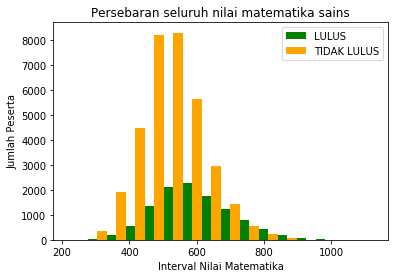

In [17]:
df_location_all = df_pass_all.groupby('uni_name').count()
df_location_all = df_location_all.sort_values("Acceptance", ascending=False)
df_location_all = df_location_all[['id_first_major']]
df_location_all.rename(columns={'id_first_major':'count'}, inplace=True)
df_location_all.reset_index()

plt.title('Persebaran seluruh nilai matematika sains')
plt.xlabel('Interval Nilai Matematika')
plt.ylabel('Jumlah Peserta')

plt.hist([df_pass_all['score_mat'],df_fail_all['score_mat']], bins = 16,
        rwidth=10, color=['green','orange'], label=['LULUS','TIDAK LULUS']) 
plt.legend()

### Persebaran nilai matematika sains di atas rata-rata

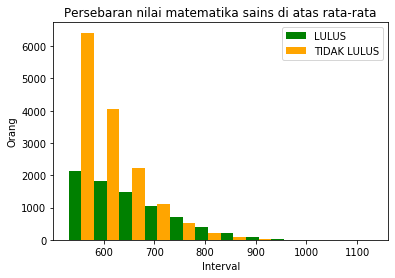

In [18]:
plt.title('Persebaran nilai matematika sains di atas rata-rata')
plt.xlabel('Interval')
plt.ylabel('Orang')

plt.hist([df_pass['score_mat'],df_fail['score_mat']], bins = [531,581,631,681,731,781,831,881,931,981,1031,1081,1131],
        rwidth=10, color=['green','orange'], label=['LULUS','TIDAK LULUS']) 
plt.legend()

### Membuat data frame yang berisi jumlah peserta dengan nilai matematika di atas rata-rata yang lulus di  program studi dan PTN.

In [19]:
df_location = df_pass.groupby('uni_name').count()
df_location = df_location.sort_values("Acceptance", ascending=False)
df_location = df_location[['id_first_major']]
df_location.rename(columns={'id_first_major':'count'}, inplace=True)
df_location.reset_index()
df_location

,count
uni_name,
SEKOLAH TEK. ELEKTRO & INFORMATIKA (STEI)-INSTITUT TEKNOLOGI BANDUNG,128
FAK. TEKNIK PERTAMB. & PERMINYAKAN (FTTM)-INSTITUT TEKNOLOGI BANDUNG,91
FAK. MATEMATIKA & ILMU PENGET. ALAM (FMIPA)-INSTITUT TEKNOLOGI BANDUNG,89
PENDIDIKAN DOKTER-UNIVERSITAS PADJADJARAN,79
KEDOKTERAN-UNIVERSITAS GADJAH MADA,76
...,...
PENDIDIKAN DOKTER GIGI-UNIVERSITAS SYIAH KUALA,1
BIOLOGI-INSTITUT TEKNOLOGI SEPULUH NOPEMBER,1
FISIKA-UNIVERSITAS JENDERAL SOEDIRMAN,1


### Membuat data frame yang berisi 20 universtas yang menerima peserta dengan nilai matematika di atas rata-rata terbanyak, dan memperlihatkan hasilnya pada bar plot. 

In [20]:
df_location = df_pass.groupby('uni_name').count()
df_location = df_location.sort_values("Acceptance", ascending=False)
df_location = df_location[['id_first_major']]
df_location.rename(columns={'id_first_major':'count'}, inplace=True)
df_location = df_location.reset_index()
df_location_top=df_location[:20]

Text(0.5, 1.0, '20 Universitas yang Menerima Peserta Dengan Nilai Matematika di Atas Rata-rata Terbanyak')

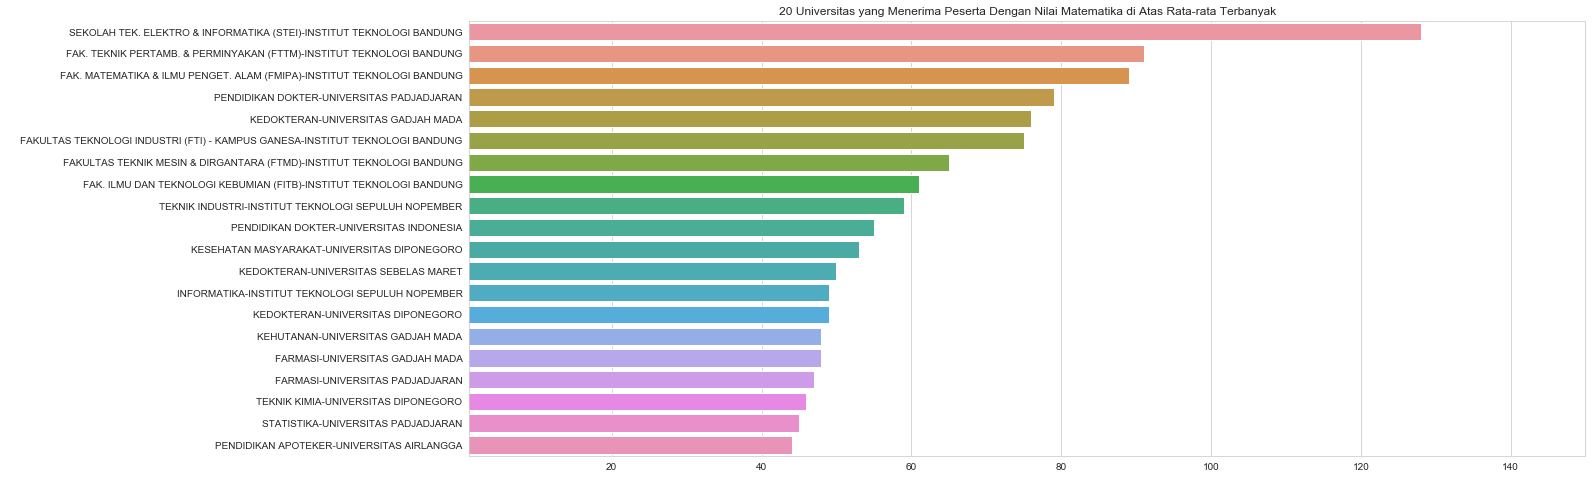

In [21]:
plt.figure(figsize=(20,8))
sns.set_style("whitegrid")
graph = sns.barplot(data=df_location_top, x='count', y='uni_name')
plt.xlim(1,150)
plt.ylabel('UNIVERSITIES', color='w')
plt.xlabel('COUNTS', color='w')
plt.title('20 Universitas yang Menerima Peserta Dengan Nilai Matematika di Atas Rata-rata Terbanyak')

### Memperjelas grafik pada persebaran nilai matematika dengan membuat data frame yang berisi perserta dengan nilai matematika di atas 750.

In [22]:
#Data limit to above the average score math
df_himat = df_above_average[(df_above_average['score_mat'] > 750)]

#sorting the dataframe
df_himat = df_himat.sort_values("score_mat", ascending=False)

#Dataframe for above average and passed the exam
df_pass_himat = df_himat[(df_himat['Acceptance'] == 'LULUS')]
df_fail_himat = df_himat[(df_himat['Acceptance'] == 'TIDAK LULUS')]

#Where the applicants pass the exam
df_pass_himat.loc[:,'location'] = np.where((df_pass_himat.Grade > df_pass_himat.Passing_Grade_1), df_pass_himat.loc[:,'id_first_major'], df_pass_himat.loc[:,'id_second_major'])

#Location
df_pass_himat.loc[:,'uni_name'] = df_pass_himat['location'].map(df_passingGrade.set_index('id_major')['major_uni'])

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\indexing.py:844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [23]:
df_himat.groupby('Acceptance').count()

,Unnamed: 0,id_first_major,id_first_university,id_second_major,id_second_university,id_user,score_bio,score_fis,score_kim,score_kmb,score_kpu,score_kua,score_mat,score_ppu,Grade,Passing_Grade_1,Passing_Grade_2
Acceptance,,,,,,,,,,,,,,,,,
LULUS,1139,1139,1139,1139,1139,1139,1139,1139,1139,1139,1139,1139,1139,1139,1139,1139,1139
TIDAK LULUS,574,574,574,574,574,574,574,574,574,574,574,574,574,574,574,574,574


In [24]:
df_location_himat = df_pass_himat.groupby('uni_name').count()
df_location_himat = df_location_himat.sort_values("Acceptance", ascending=False)
df_location_himat = df_location_himat[['id_first_major']]
df_location_himat.rename(columns={'id_first_major':'count'}, inplace=True)
df_location_himat.reset_index()

,uni_name,count
0,SEKOLAH TEK. ELEKTRO & INFORMATIKA (STEI)-INST...,47
1,KEDOKTERAN-UNIVERSITAS GADJAH MADA,27
2,FAK. MATEMATIKA & ILMU PENGET. ALAM (FMIPA)-IN...,24
3,FAKULTAS TEKNOLOGI INDUSTRI (FTI) - KAMPUS GAN...,24
4,PENDIDIKAN DOKTER-UNIVERSITAS PADJADJARAN,23
...,...,...
338,PEND. DOKTER-UNIVERSITAS TANJUNGPURA,1
339,PENDIDIKAN BIOLOGI-UNIVERSITAS NEGERI SEMARANG,1
340,PENDIDIKAN BIOLOGI-UNIVERSITAS NEGERI YOGYAKARTA,1
341,PENDIDIKAN BIOLOGI-UNIVERSITAS SEBELAS MARET,1


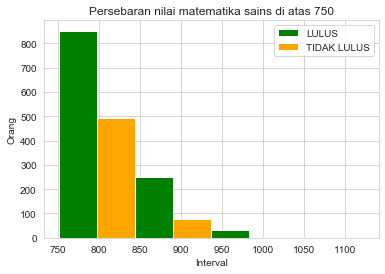

In [25]:
plt.title('Persebaran nilai matematika sains di atas 750')
plt.xlabel('Interval')
plt.ylabel('Orang')

plt.hist([df_pass_himat['score_mat'],df_fail_himat['score_mat']], bins = 4,
        rwidth=10, color=['green','orange'], label=['LULUS','TIDAK LULUS']) 
plt.legend()

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\indexing.py:844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


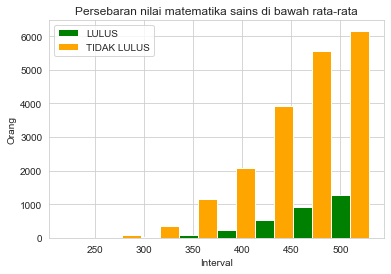

In [26]:
#Data limit to below the average score math
df_below_average = df_score_science[(df_score_science['score_mat'] < average)]

#sorting the dataframe
df_below_average = df_below_average.sort_values("score_mat", ascending=False)

#Showing grade of every applicant
df_below_average.loc[:,'Grade'] = df_below_average[['score_bio',
                                                    'score_kim',
                                                    'score_kmb',
                                                    'score_kpu',
                                                    'score_kua',
                                                    'score_mat',
                                                    'score_ppu']].mean(axis=1)
#Merging the scores dataframe and corresponding passing grades for each major chosen
df_below_average = df_below_average[['id_first_major','id_second_major','score_mat','Grade']].copy()
df_below_average = df_below_average.merge(df_passingGrade[['id_major','Passing_Grade']], left_on='id_first_major', right_on='id_major', how='left').drop('id_major',axis=1).rename(columns={'Passing_Grade':'Passing_Grade_1'})
df_below_average = df_below_average.merge(df_passingGrade[['id_major','Passing_Grade']], left_on='id_second_major', right_on='id_major', how='left').drop('id_major',axis=1).rename(columns={'Passing_Grade':'Passing_Grade_2'})

#Checking if the applicants are passing the exam
df_below_average.loc[:,'Acceptance'] = np.where((df_below_average.Grade > df_below_average.Passing_Grade_1) | 
                                                (df_below_average.Grade > df_below_average.Passing_Grade_2),"LULUS", "TIDAK LULUS")

#Cleaning the NaN
df_below_average.dropna(subset = ["Passing_Grade_1"], inplace = True)
df_below_average.dropna(subset = ["Passing_Grade_2"], inplace = True)

#Dataframe for above average and passed the exam
df_pass1 = df_below_average[(df_below_average['Acceptance'] == 'LULUS')]
df_fail1 = df_below_average[(df_below_average['Acceptance'] == 'TIDAK LULUS')]

#Where the applicants pass the exam
df_pass1.loc[:,'location'] = np.where((df_pass1.Grade > df_pass1.Passing_Grade_1), df_pass1.loc[:,'id_first_major'], df_pass1.loc[:,'id_second_major'])
df_pass1.loc[:,'uni_name'] = df_pass1['location'].map(df_passingGrade.set_index('id_major')['major_uni'])

#creating a histograph
df_location1 = df_pass1.groupby('uni_name').count()
df_location1 = df_location1.sort_values("Acceptance", ascending=False)
df_location1 = df_location1[['id_first_major']]
df_location1.rename(columns={'id_first_major':'count'}, inplace=True)
df_location1.reset_index()

plt.title('Persebaran nilai matematika sains di bawah rata-rata')
plt.xlabel('Interval')
plt.ylabel('Orang')

plt.hist([df_pass1['score_mat'],df_fail1['score_mat']], bins = 8,
        rwidth=10, color=['green','orange'], label=['LULUS','TIDAK LULUS']) 
plt.legend()

In [27]:
df_location_low = df_pass1.groupby('uni_name').count()
df_location_low = df_location_low.sort_values("Acceptance", ascending=False)
df_location_low = df_location_low[['id_first_major']]
df_location_low.rename(columns={'id_first_major':'count'}, inplace=True)
df_location_low = df_location_low.reset_index()
df_location_low1=df_location_low[:20]

Text(0.5, 1.0, '20 Universitas yang Menerima Peserta Dengan Nilai Matematika di Bawah Rata-rata Terbanyak')

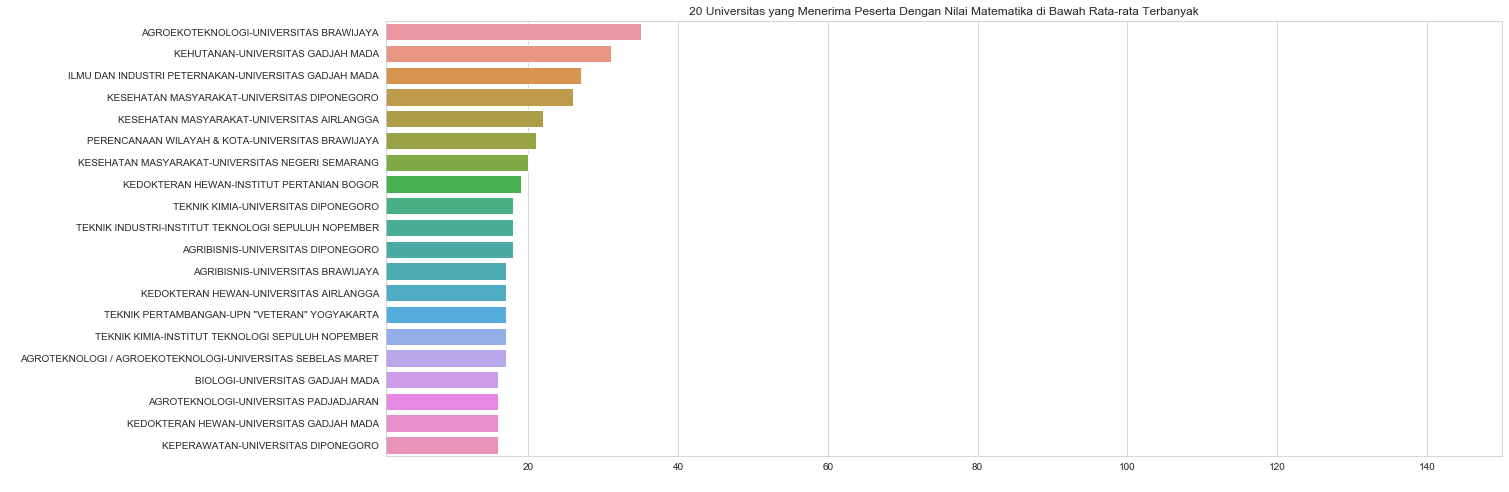

In [28]:
plt.figure(figsize=(20,8))
sns.set_style("whitegrid")
graph = sns.barplot(data=df_location_low1, x='count', y='uni_name')
plt.xlim(1,150)
plt.ylabel('UNIVERSITIES', color='w')
plt.xlabel('COUNTS', color='w')
plt.title('20 Universitas yang Menerima Peserta Dengan Nilai Matematika di Bawah Rata-rata Terbanyak')

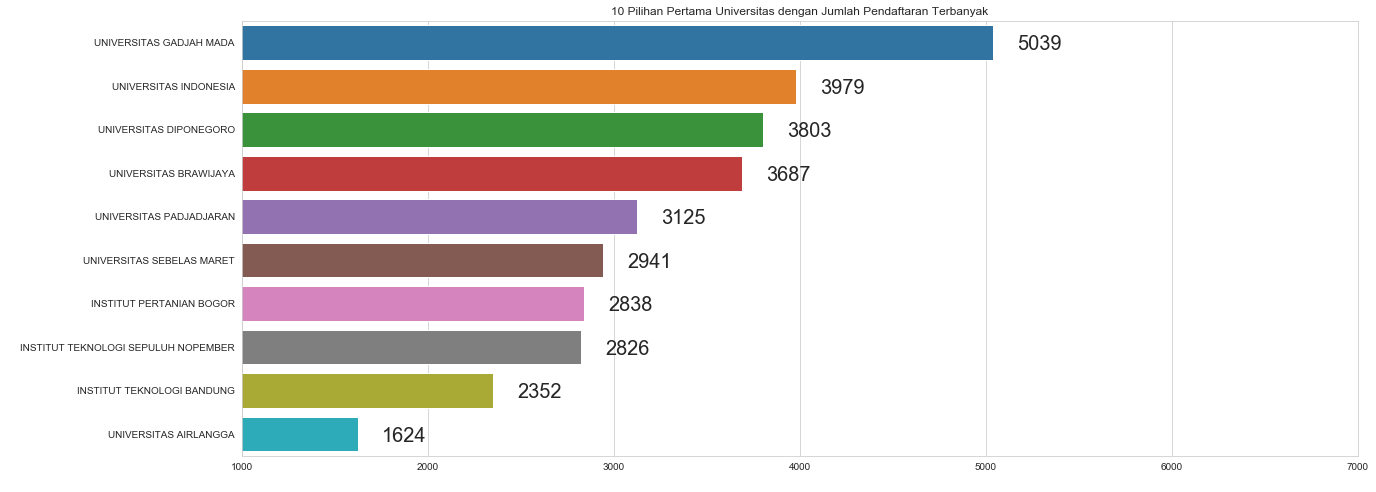

In [29]:
#nilai pilihan pertama
df_score_sci_1 = df_score_science[["id_first_major", "id_first_university"]].copy().reset_index()
df_score_sci_1["choice"] = 1
df_score_sci_1.rename(columns={"id_first_major": "id_major", "id_first_university": "id_university"}, inplace = True)
#nilai pilihan kedua
df_score_sci_2 = df_score_science[["id_second_major", "id_second_university"]].copy().reset_index()
df_score_sci_2["choice"] = 1
df_score_sci_2.rename(columns={"id_second_major": "id_major", "id_second_university": "id_university"}, inplace=True)
#nilai semuanya
df_score_science_all = pd.concat([df_score_sci_1, df_score_sci_2])
#kampus piilihan pertama 
df_fav_univ1 = df_score_sci_1.groupby(by= "id_university").count().sort_values(by='choice', ascending=False)[0:10]
df_fav_univ1 = df_fav_univ1.reset_index().merge(df_universities, on = "id_university", how = "left")
df_fav_univ1_summary = df_fav_univ1[['choice', 'university_name']].copy()
#df_fav_univ1_summary

 

#visualize 
plt.figure(figsize=(20,8))
sns.set_style("whitegrid")
graph = sns.barplot(data=df_fav_univ1_summary, x='choice', y='university_name')
plt.xlim(1000,7000)
plt.ylabel('UNIVERSITIES', color='w')
plt.xlabel('COUNTS', color='w')
plt.title('10 Pilihan Pertama Universitas dengan Jumlah Pendaftaran Terbanyak')
plt.rcParams['font.size']=20

 

for p in graph.patches:
    width = p.get_width()
    plt.text(250+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:.0f}'.format(width), ha='center', va='center')
        
plt.show()

## 3. Choose a Model

Model yang kami gunakan adalah:
1. Decision Tree
2. Random Forest 

### 4. Train the Model

### 4.1 Decision Tree

### Pertama kami menggunakan data seluruh peserta yang mengikuti TKA di UTBK 2019.

In [30]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

#split dataset in features and target variable
feature_cols = ['score_mat']
X = df_score_science[feature_cols] # Features
y = df_score_science.Acceptance # Target variable

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7665263313390944


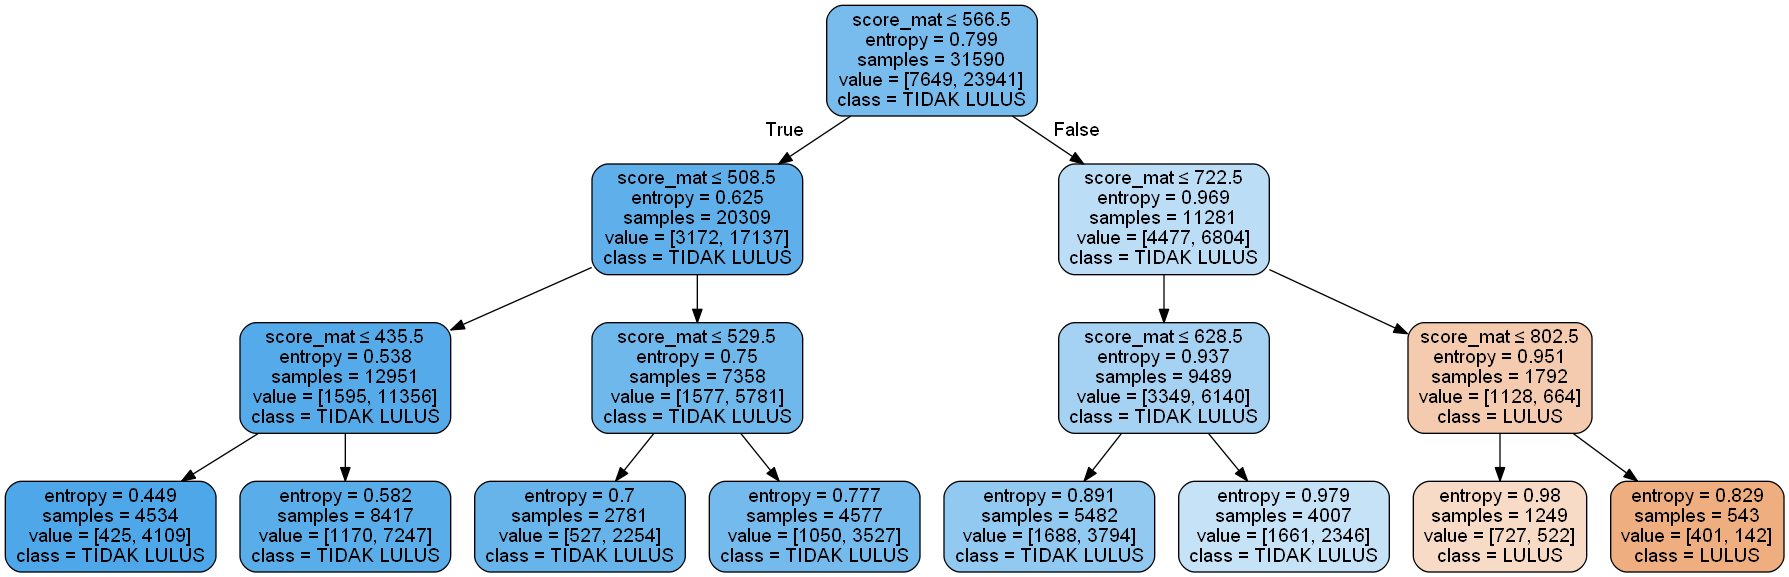

In [31]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['LULUS','TIDAK LULUS'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('score_science.png')
Image(graph.create_png())

### Kedua, kami menggunakan data peserta dengan nilai matematika di atas rata-rata.

In [32]:
#split dataset in features and target variable
feature_cols = ['score_mat']
X = df_above_average[feature_cols] # Features
y = df_above_average.Acceptance # Target variable

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [33]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6748339483394834


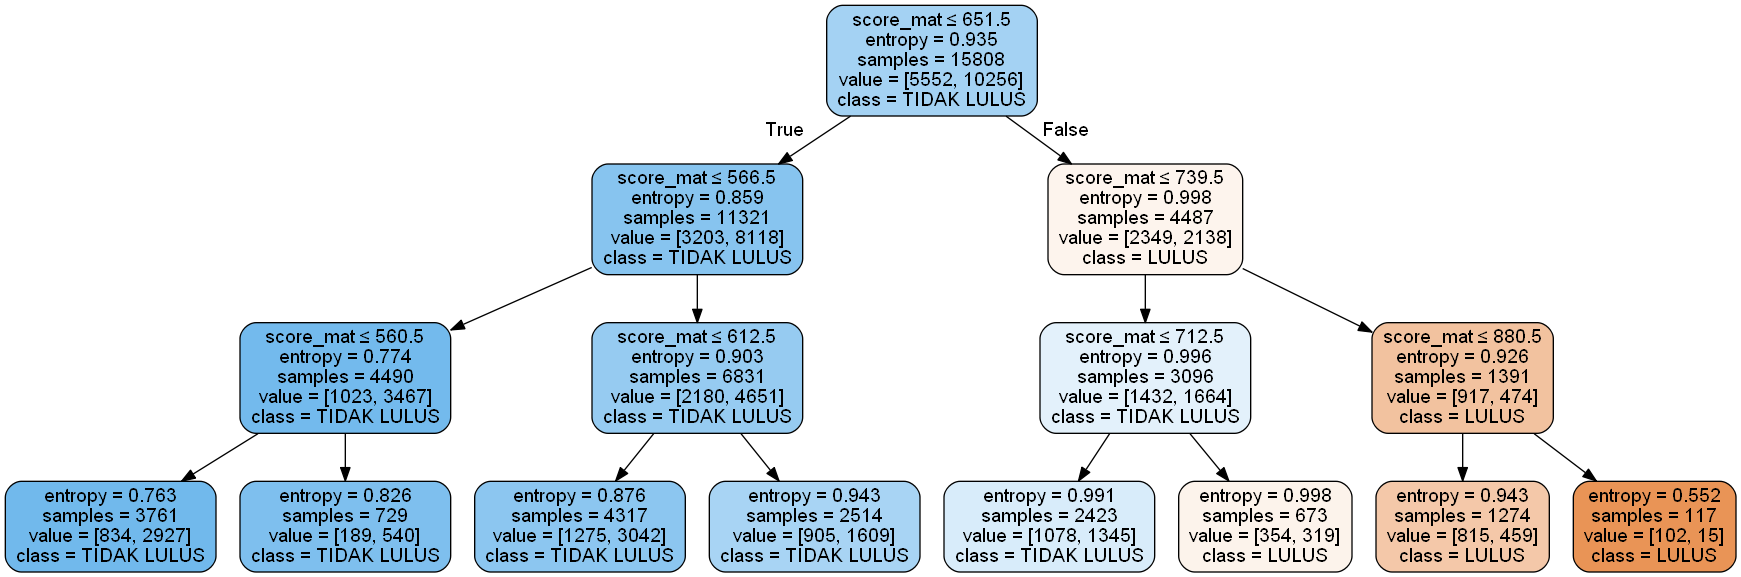

In [34]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['LULUS','TIDAK LULUS'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('above_average1.png')
Image(graph.create_png())

### 4.2 Random Forest

### 4.2.1 Membuat random forest untuk memprediksi kelulusan dari seluruh peserta berdasarkan nilai matematika. Data dipisah menjadi 75% training dan 25% test dalam masing-masing dataframe yang baru.


In [35]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(0)

df_score_science['is_train'] = np.random.uniform(0, 1, len(df_score_science)) <= .75

train, test = df_score_science[df_score_science['is_train']==True], df_score_science[df_score_science['is_train']==False]

print('train ',len(train))
print('test ',len(test))

train  33894
test  11235


Pemilihan feature yaitu nilai matematika 'score_mat'.

In [36]:
features_1 = df_score_science.columns[[12]]
features_1

Index(['score_mat'], dtype='object')

Mengubah faktor kelulusan menjadi angka 0 dan 1. Setelah itu, membuat random forest classifier dan fitting untuk data features dalam dataset training.

In [37]:
y,label = pd.factorize(train['Acceptance'])

clf = RandomForestClassifier()
clf.fit(train[features_1],y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Menguji model dengan test set yang telah disiapkan.

In [38]:
pred = clf.predict(test[features_1])
pred

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

Membuat confusion matrix dari hasil prediksi 

In [39]:
pred_label = label[pred]
pd.crosstab(test['Acceptance'], pred_label, rownames=['Actual Acceptance'], colnames =['Predicted Acceptance'])

Predicted Acceptance,LULUS,TIDAK LULUS
Actual Acceptance,,
LULUS,460,2283
TIDAK LULUS,324,8168


Melalui confusion matrix tersebut, kita dapat menghitung keakuratan dari model, (459+8180)/(459+2284+312+8180) = 0.7689364
Untuk melihat keakuratan lebih lanjut, dapat digunakan k-fold cross validation sebagai berikut.

In [40]:
from sklearn.model_selection import cross_val_score
cross_val_score(RandomForestClassifier(), train[features_1], y)

array([0.76928751, 0.76574716, 0.76736982, 0.75851896, 0.77456477])

### 4.2.2 Membuat random forest dengan metode dan tujuan sama seperti sebelumnya tetapi berdasarkan semua nilai dari peserta.

In [41]:
features_2 = df_score_science.columns[6:14]
features_2

Index(['score_bio', 'score_fis', 'score_kim', 'score_kmb', 'score_kpu',
       'score_kua', 'score_mat', 'score_ppu'],
      dtype='object')

In [42]:
clf.fit(train[features_2],y)
pred_2 = clf.predict(test[features_2])
pred_label_2 = label[pred_2]
pd.crosstab(test['Acceptance'], pred_label_2, rownames=['Actual Acceptance'], colnames =['Predicted Acceptance'])

Predicted Acceptance,LULUS,TIDAK LULUS
Actual Acceptance,,
LULUS,1970,773
TIDAK LULUS,550,7942


In [43]:
cross_val_score(RandomForestClassifier(), train[features_2], y)

array([0.87254757, 0.88169347, 0.87682549, 0.88567635, 0.89067572])

### 4.2.3 Membuat random forest untuk memprediksi di universitas mana peserta akan lulus berdasarkan nilai matematika.

In [44]:
np.random.seed(0)
df_pass_all['is_train'] = np.random.uniform(0, 1, len(df_pass_all)) <= .75

train, test = df_pass_all[df_pass_all['is_train']==True], df_pass_all[df_pass_all['is_train']==False]

features_3 = df_pass_all.columns[[12]]
features_3

C:\Users\Asus\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Index(['score_mat'], dtype='object')

In [45]:
y,label = pd.factorize(train['uni_name'])
clf.fit(train[features_3],y)

pred_3 = clf.predict(test[features_3])
pred_label_3 = label[pred_3]

pd.crosstab(test['uni_name'], pred_label_3, rownames=['Actual University'], colnames =['Predicted University'])

Predicted University,INSTITUT PERTANIAN BOGOR,INSTITUT TEKNOLOGI BANDUNG,INSTITUT TEKNOLOGI SEPULUH NOPEMBER,UNIVERSITAS AIRLANGGA,UNIVERSITAS ANDALAS,UNIVERSITAS BRAWIJAYA,UNIVERSITAS DIPONEGORO,UNIVERSITAS GADJAH MADA,UNIVERSITAS HALUOLEO,UNIVERSITAS INDONESIA,...,UNIVERSITAS NEGERI YOGYAKARTA,UNIVERSITAS PADJADJARAN,UNIVERSITAS SAM RATULANGI,UNIVERSITAS SEBELAS MARET,UNIVERSITAS SRIWIJAYA,UNIVERSITAS SUMATERA UTARA,UNIVERSITAS UDAYANA,"UPN ""VETERAN"" JAKARTA","UPN ""VETERAN"" JAWA TIMUR","UPN ""VETERAN"" YOGYAKARTA"
Actual University,,,,,,,,,,,,,,,,,,,,,
INSTITUT PERTANIAN BOGOR,14,12,23,4,3,16,27,41,0,7,...,0,6,1,3,0,0,0,0,3,5
INSTITUT TEKNOLOGI BANDUNG,9,17,18,6,0,18,24,41,0,13,...,0,13,0,4,1,0,0,2,1,0
INSTITUT TEKNOLOGI SEPULUH NOPEMBER,25,17,20,5,4,23,27,53,0,15,...,1,11,0,4,1,0,0,0,0,3
UNIVERSITAS AIRLANGGA,10,7,11,4,0,10,17,28,0,6,...,0,8,0,2,1,0,0,0,0,2
UNIVERSITAS ANDALAS,5,5,7,1,0,4,8,12,0,4,...,0,1,0,3,0,0,0,0,0,0
UNIVERSITAS BENGKULU,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
UNIVERSITAS BRAWIJAYA,19,9,29,4,2,18,40,45,0,19,...,0,14,0,5,2,1,0,1,0,3
UNIVERSITAS DIPONEGORO,28,17,31,10,0,25,40,62,0,5,...,0,16,0,6,0,0,1,0,2,6
UNIVERSITAS GADJAH MADA,23,18,33,6,4,34,43,88,0,18,...,0,17,0,10,0,0,1,1,2,4


In [46]:
cross_val_score(RandomForestClassifier(), train[features_3], y)

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


array([0.07409639, 0.08614458, 0.08313253, 0.079566  , 0.08559373])

### Dapat dilihat melalui keakuratan prediksi model bahwa sulit untuk membuat model yang dapat menentukan di mana siswa akan diterima berdasarkan nilai matematikanya.

## 5. Kesimpulan 

Korelasi antara nilai matematika pada peserta saintek UTBK 2019 dengan lulus/tidaknya pada program studi dan PTN yang dituju tidak signifikan. Hal ini dikarenakan adanya banyak variabel lainnya yang memengaruhi kelulusan peserta, seperti nilai TKA di bidang lain, nilai TPS peserta, dan kapasitas dari setiap program studi di PTN-nya masing-masing. Lalu dalam proyek ini, kami menggunakan rata-rata dari seluruh nilai sebagai Grade dari tiap peserta. Metode ini merupakan metode yang kami gunakan secara kasar karena tidak ada sumber yang menjelaskan persentase dari tiap nilai tersebut di dalam nilai keseluruhan dari satu peserta. Namun kami masih dapat melihat dimana peserta yang memiliki nilai matematika diatas rata-rata diterima dalam PTN yang diminatinya. 